### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [175]:
season_22_23 = pd.read_csv('../data/processed/Season(2022-23).csv')
season_23_24 = pd.read_csv('../data/processed/Season(2023-24).csv')

In [111]:
print(season_22_23.columns)
print(season_23_24.columns)

Index(['Date', 'Name', 'Team', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+-', 'TeamAbbr', 'GameLink', 'Opponent', 'Home', 'GameType', 'id', 'fpts_fanduel'], dtype='object')
Index(['Date', 'Name', 'Team', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+-', 'TeamAbbr', 'GameLink', 'Opponent', 'Home', 'GameType', 'id', 'fpts_fanduel'], dtype='object')


In [176]:
print(season_22_23.isnull().sum())
print(season_23_24.isnull().sum())

Date            0
Name            0
Team            0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GmSc            0
+-              0
TeamAbbr        0
GameLink        0
Opponent        0
Home            0
GameType        0
id              0
fpts_fanduel    0
dtype: int64
Date            0
Name            0
Team            0
MP              0
FG              0
FGA             0
FG%             0
3P              0
3PA             0
3P%             0
FT              0
FTA             0
FT%             0
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GmSc            0
+-             

In [13]:
season_22_23['Date'] = pd.to_datetime(season_22_23['Date'], format='%Y%m%d')
season_23_24['Date'] = pd.to_datetime(season_23_24['Date'], format='%Y%m%d')

In [94]:
season_22_23.head(20)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
0,20221018,tyrese maxey,Philadelphia 76ers,38:11,8,16,.500,2,5,.400,3,3,1.000,0,1,1,2,2,0,1,5,21,13.7,-6,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20002546,30.2
1,20221018,james harden,Philadelphia 76ers,37:17,9,14,.643,5,9,.556,12,12,1.000,0,8,8,7,0,0,3,3,35,31.9,+1,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20000544,52.1
2,20221018,joel embiid,Philadelphia 76ers,37:16,9,18,.500,1,6,.167,7,9,.778,1,14,15,5,0,1,6,4,26,17.7,-13,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20000726,48.5
3,20221018,tobias harris,Philadelphia 76ers,34:14,7,14,.500,3,6,.500,1,2,.500,1,1,2,0,3,0,0,3,18,13.4,-1,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20000676,29.4
4,20221018,p.j. tucker,Philadelphia 76ers,33:01,3,5,.600,0,2,.000,0,0,0,2,2,4,0,0,1,2,2,6,3.6,-6,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20000856,11.8
5,20221018,de'anthony melton,Philadelphia 76ers,20:33,2,4,.500,1,2,.500,0,0,0,0,0,0,0,1,0,0,2,5,3.2,-13,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20002029,8.0
6,20221018,danuel house jr.,Philadelphia 76ers,16:12,0,2,.000,0,1,.000,1,2,.500,0,1,1,1,2,0,1,2,1,0.4,-5,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20001747,8.7
7,20221018,georges niang,Philadelphia 76ers,12:09,1,4,.250,1,3,.333,0,0,0,0,0,0,1,0,0,0,1,3,0.9,-5,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20001708,4.5
8,20221018,montrezl harrell,Philadelphia 76ers,10:44,1,3,.333,0,0,0,0,0,0,0,0,0,0,0,1,1,3,2,-1.2,+4,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20001447,4.0
9,20221018,matisse thybulle,Philadelphia 76ers,0:23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,-1,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,20002288,0.0


In [58]:
season_22_23.tail(10)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
33596,2023-06-12,bruce brown,Denver Nuggets,28:09,4,14,.286,0,5,.000,2,4,.500,4,2,6,1,1,0,1,1,10,4.7,0,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20002040,20.7
33597,2023-06-12,christian braun,Denver Nuggets,24:17,2,4,.500,0,0,0,3,6,.500,1,2,3,1,0,1,0,0,7,6.5,0,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20002868,15.1
33598,2023-06-12,jeff green,Denver Nuggets,4:44,2,2,1.000,0,0,0,0,0,0,0,0,0,1,0,0,0,2,4,3.3,-5,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20000632,5.5
33599,2023-06-12,deandre jordan,Denver Nuggets,3:01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.7,-2,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,20000663,3.0
33600,2023-06-12,thomas bryant,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,-1,0.0
33601,2023-06-12,vlatko cancar,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,-1,0.0
33602,2023-06-12,reggie jackson,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,-1,0.0
33603,2023-06-12,zeke nnaji,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,-1,0.0
33604,2023-06-12,ish smith,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,-1,0.0
33605,2023-06-12,peyton watson,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores...,Miami Heat,1,Finals,-1,0.0


In [95]:
season_23_24.head(20)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
0,20231024,d'angelo russell,Los Angeles Lakers,36:11,4,12,.333,2,5,.400,1,2,.500,0,4,4,7,1,0,3,3,11,6.7,+1,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20001458,26.3
1,20231024,anthony davis,Los Angeles Lakers,34:09,6,17,.353,1,2,.500,4,4,1.000,1,7,8,4,0,2,2,3,17,11.3,-17,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20000468,36.6
2,20231024,austin reaves,Los Angeles Lakers,31:20,4,11,.364,1,2,.500,5,7,.714,4,4,8,4,2,0,2,2,14,13.1,-14,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20002720,33.6
3,20231024,taurean prince,Los Angeles Lakers,29:53,6,8,.750,4,6,.667,2,2,1.000,1,2,3,1,0,1,1,0,18,16.5,-14,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20001680,25.1
4,20231024,lebron james,Los Angeles Lakers,29:00,10,16,.625,1,4,.250,0,1,.000,1,7,8,5,1,0,0,1,21,20.3,+7,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20000571,41.1
5,20231024,gabe vincent,Los Angeles Lakers,22:18,3,8,.375,0,4,.000,0,0,0,1,0,1,2,1,0,2,3,6,1.5,-17,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20002254,11.2
6,20231024,cam reddish,Los Angeles Lakers,17:38,2,4,.500,1,2,.500,2,2,1.000,2,2,4,0,0,1,0,2,7,6.9,+7,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20002276,14.8
7,20231024,christian wood,Los Angeles Lakers,15:28,3,4,.750,0,1,.000,1,2,.500,1,3,4,0,0,0,1,1,7,5.2,+2,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20001527,10.8
8,20231024,rui hachimura,Los Angeles Lakers,14:39,3,10,.300,0,3,.000,0,0,0,2,1,3,0,0,0,0,2,6,1.1,-8,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20002275,9.6
9,20231024,jaxson hayes,Los Angeles Lakers,6:54,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,-0.1,-7,LAL,https://www.basketball-reference.com/boxscores/202310240DEN.html,Denver Nuggets,0,Season,20002274,1.2


In [96]:
season_23_24.tail(10)

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
34116,20240617,sam hauser,Boston Celtics,17:07,3,7,.429,2,6,.333,0,0,0,3,1,4,1,1,0,0,1,8,8.0,+3,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,20002686,17.3
34117,20240617,kristaps porzingis,Boston Celtics,16:05,2,4,.500,0,2,.000,1,2,.500,0,1,1,0,0,0,0,2,5,2.1,+8,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,20001406,6.2
34118,20240617,luke kornet,Boston Celtics,2:02,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0.7,-2,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,20001889,1.2
34119,20240617,payton pritchard,Boston Celtics,1:25,1,1,1.000,1,1,1.000,0,0,0,0,0,0,0,0,0,0,0,3,2.7,+1,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,20002551,3.0
34120,20240617,oshae brissett,Boston Celtics,0:38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,20002356,0.0
34121,20240617,svi mykhailiuk,Boston Celtics,0:38,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0.3,0,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,20002035,1.2
34122,20240617,neemias queta,Boston Celtics,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,-1,0.0
34123,20240617,jaden springer,Boston Celtics,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,-1,0.0
34124,20240617,xavier tillman sr.,Boston Celtics,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,-1,0.0
34125,20240617,jordan walsh,Boston Celtics,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,BOS,https://www.basketball-reference.com/boxscores/202406170BOS.html,Dallas Mavericks,1,Finals,-1,0.0


In [35]:
season_22_23.drop_duplicates(inplace=True)
season_23_24.drop_duplicates(inplace=True)

### EDA

In [40]:
print(season_22_23.shape)
print(season_23_24.shape)

(33606, 31)
(34126, 31)


In [70]:
print(season_22_23['fpts_fanduel'].describe())
print('\n',season_23_24['fpts_fanduel'].describe())


count    33606.000000
mean        17.388687
std         15.987825
min         -3.000000
25%          2.000000
50%         14.800000
75%         27.800000
max        105.200000
Name: fpts_fanduel, dtype: float64

 count    34126.000000
mean        17.460707
std         16.204123
min         -3.500000
25%          1.900000
50%         14.600000
75%         28.200000
max        104.100000
Name: fpts_fanduel, dtype: float64


In [68]:
pd.set_option('display.max_colwidth', None)
season_22_23.loc[season_22_23['fpts_fanduel'].idxmax()].to_frame().T

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
12928,2022-12-27 00:00:00,luka doncic,Dallas Mavericks,47:09,21,31,.677,2,6,.333,16,22,.727,5,16,21,10,2,1,4,5,60,56.3,+7,DAL,https://www.basketball-reference.com/boxscores/202212270DAL.html,New York Knicks,1,Season,20001984,105.2


In [71]:
season_22_23.loc[season_22_23['fpts_fanduel'].idxmin()].to_frame().T

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
3592,2022-11-05 00:00:00,aaron wiggins,Oklahoma City Thunder,8:41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,-4.2,+1,OKC,https://www.basketball-reference.com/boxscores/202211050MIL.html,Milwaukee Bucks,0,Season,20002714,-3.0


In [69]:
season_23_24.loc[season_23_24['fpts_fanduel'].idxmax()].to_frame().T

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
16666,2024-01-22 00:00:00,joel embiid,Philadelphia 76ers,36:38,24,41,.585,1,2,.500,21,23,.913,9,9,18,5,1,1,1,2,70,62.5,+11,PHI,https://www.basketball-reference.com/boxscores/202401220PHI.html,San Antonio Spurs,1,Season,20000726,104.1


In [72]:
season_23_24.loc[season_23_24['fpts_fanduel'].idxmin()].to_frame().T

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
8336,2023-12-08 00:00:00,duncan robinson,Miami Heat,23:12,0,7,.000,0,6,.000,1,2,.500,0,0,0,1,0,0,6,4,1,-11.2,-25,MIA,https://www.basketball-reference.com/boxscores/202312080MIA.html,Cleveland Cavaliers,1,Season,20002057,-3.5


In [80]:
print(season_22_23.isnull().any().to_frame().T)
print(season_23_24.isnull().any().to_frame().T)

    Date   Name   Team     MP     FG    FGA    FG%     3P    3PA    3P%     FT    FTA    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV     PF    PTS   GmSc     +-  TeamAbbr  GameLink  Opponent   Home  GameType     id  fpts_fanduel
0  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False     False     False     False  False     False  False         False
    Date   Name   Team     MP     FG    FGA    FG%     3P    3PA    3P%     FT    FTA    FT%    ORB    DRB    TRB    AST    STL    BLK    TOV     PF    PTS   GmSc     +-  TeamAbbr  GameLink  Opponent   Home  GameType     id  fpts_fanduel
0  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False     False     False     False  False     False  False         False


In [81]:
season_22_23[season_22_23.duplicated()]

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel


In [83]:
season_23_24[season_23_24.duplicated()]

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel


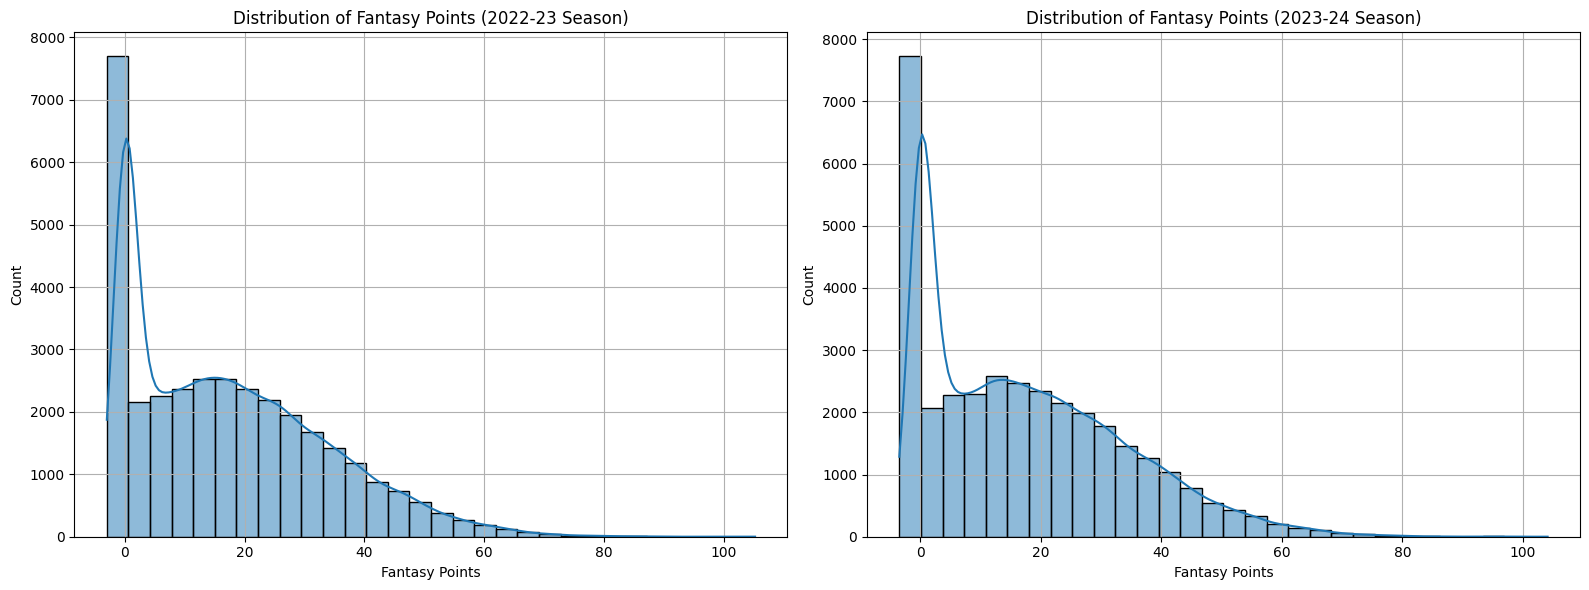

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(season_22_23['fpts_fanduel'], kde=True, bins=30, ax=axes[0])
axes[0].set_title('Distribution of Fantasy Points (2022-23 Season)')
axes[0].set_xlabel('Fantasy Points')
axes[0].set_ylabel('Count')
axes[0].grid(True)

sns.histplot(season_23_24['fpts_fanduel'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Fantasy Points (2023-24 Season)')
axes[1].set_xlabel('Fantasy Points')
axes[1].set_ylabel('Count')
axes[1].grid(True)

plt.tight_layout()
plt.show()

The distribution skews to the left towards zero because there are many players who did not play who will have 0 fantasy points. We will use the column Minutes Played (MP) to identify where players did not play, when MP = DNP. First let's fix the data types.

In [122]:
season_22_23.dtypes.to_frame().T

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
0,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,int64,float64


In [123]:
season_23_24.dtypes.to_frame().T

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
0,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,int64,object,int64,float64


### Clean Datasets

In [152]:
season_22_23 = pd.read_csv('../data/processed/Season(2022-23).csv')
season_23_24 = pd.read_csv('../data/processed/Season(2023-24).csv')
print(season_22_23.tail())
print(season_23_24.tail())

           Date            Name            Team   MP   FG  FGA  FG%   3P  3PA  3P%   FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  PTS GmSc   +- TeamAbbr                                                          GameLink    Opponent  Home GameType  id  fpts_fanduel
33601  20230612   vlatko cancar  Denver Nuggets  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33602  20230612  reggie jackson  Denver Nuggets  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33603  20230612      zeke nnaji  Denver Nuggets  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP  DNP      DEN  https://www.basket

In [153]:
def fix_data_types(df):
    # Define the columns
    stats_columns = [
        'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 
        'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 
        'GmSc', 'fpts_fanduel', 'id', '+-'
    ]
    
    # Replace 'DNP' with NaN for stats columns but keep 'MP' as it is
    df[stats_columns] = df[stats_columns].replace('DNP', pd.NA)
    
    # Convert Date to datetime format
    df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
    
    # Convert columns to appropriate data types
    df['Name'] = df['Name'].astype(str)
    df['Team'] = df['Team'].astype(str)
    
    # Keep 'MP' as string in 'MM:SS' format
    df['MP'] = df['MP'].astype(str)
    
    # Convert numeric columns
    numeric_columns = [
        'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 
        'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'id'
    ]
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    
    percentage_columns = ['FG%', '3P%', 'FT%']
    df[percentage_columns] = df[percentage_columns].apply(pd.to_numeric, errors='coerce')
    
    df['GmSc'] = pd.to_numeric(df['GmSc'], errors='coerce')
    df['+-'] = pd.to_numeric(df['+-'], errors='coerce')
    
    df['TeamAbbr'] = df['TeamAbbr'].astype(str)
    df['GameLink'] = df['GameLink'].astype(str)
    df['Opponent'] = df['Opponent'].astype(str)
    df['Home'] = df['Home'].astype(int)
    df['GameType'] = df['GameType'].astype(str)
    df['fpts_fanduel'] = pd.to_numeric(df['fpts_fanduel'], errors='coerce')
    
    return df

# Apply the function to both datasets
season_22_23 = fix_data_types(season_22_23)
season_23_24 = fix_data_types(season_23_24)

# Verify the data types
print(season_22_23.tail())
print(season_23_24.tail())

            Date            Name            Team   MP  FG  FGA  FG%  3P  3PA  3P%  FT  FTA  FT%  ORB  DRB  TRB  AST  STL  BLK  TOV  PF  PTS  GmSc  +- TeamAbbr                                                          GameLink    Opponent  Home GameType  id  fpts_fanduel
33601 2023-06-12   vlatko cancar  Denver Nuggets  DNP NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN   NaN NaN      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33602 2023-06-12  reggie jackson  Denver Nuggets  DNP NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN   NaN NaN      DEN  https://www.basketball-reference.com/boxscores/202306120DEN.html  Miami Heat     1   Finals  -1           0.0
33603 2023-06-12      zeke nnaji  Denver Nuggets  DNP NaN  NaN  NaN NaN  NaN  NaN NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN NaN  NaN   NaN NaN      DEN  https://www.basketball-referen

In [154]:
print(season_22_23.dtypes.to_frame().T)
print(season_23_24.dtypes.to_frame().T)

             Date    Name    Team      MP       FG      FGA      FG%       3P      3PA      3P%       FT      FTA      FT%      ORB      DRB      TRB      AST      STL      BLK      TOV       PF      PTS     GmSc       +- TeamAbbr GameLink Opponent   Home GameType     id fpts_fanduel
0  datetime64[ns]  object  object  object  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64   object   object   object  int64   object  int64      float64
             Date    Name    Team      MP       FG      FGA      FG%       3P      3PA      3P%       FT      FTA      FT%      ORB      DRB      TRB      AST      STL      BLK      TOV       PF      PTS     GmSc       +- TeamAbbr GameLink Opponent   Home GameType     id fpts_fanduel
0  datetime64[ns]  object  object  object  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  float64  flo

In [157]:
def fix_dnp_columns(df):
  dnp_indices = df['MP'] == 'DNP'
  df.loc[dnp_indices, 'fpts_fanduel'] = pd.NA
  df.loc[dnp_indices, 'id'] = pd.NA
  return df

season_22_23 = fix_dnp_columns(season_22_23)
season_23_24 = fix_dnp_columns(season_23_24)


print(season_22_23.head(25))
print(season_23_24.head(25))

         Date               Name                Team     MP    FG   FGA    FG%   3P   3PA    3P%    FT   FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  GmSc    +- TeamAbbr                                                          GameLink            Opponent  Home GameType          id  fpts_fanduel
0  2022-10-18       tyrese maxey  Philadelphia 76ers  38:11   8.0  16.0  0.500  2.0   5.0  0.400   3.0   3.0  1.000  0.0   1.0   1.0  2.0  2.0  0.0  1.0  5.0  21.0  13.7  -6.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20002546.0          30.2
1  2022-10-18       james harden  Philadelphia 76ers  37:17   9.0  14.0  0.643  5.0   9.0  0.556  12.0  12.0  1.000  0.0   8.0   8.0  7.0  0.0  0.0  3.0  3.0  35.0  31.9   1.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20000544.0          52.1
2  2022-10-18        joel embiid  Philadelphia 76ers  37:16   9.

In [167]:
# season_22_23['id'] = season_22_23['id'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
# season_23_24['id'] = season_23_24['id'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
print(season_22_23.head(25))
print('-' * 300)
print(season_23_24.head(25))
print('-' * 300)
print(season_22_23.dtypes.to_frame().T)
print(season_23_24.dtypes.to_frame().T)

         Date               Name                Team     MP    FG   FGA    FG%   3P   3PA    3P%    FT   FTA    FT%  ORB   DRB   TRB  AST  STL  BLK  TOV   PF   PTS  GmSc    +- TeamAbbr                                                          GameLink            Opponent  Home GameType        id  fpts_fanduel
0  2022-10-18       tyrese maxey  Philadelphia 76ers  38:11   8.0  16.0  0.500  2.0   5.0  0.400   3.0   3.0  1.000  0.0   1.0   1.0  2.0  2.0  0.0  1.0  5.0  21.0  13.7  -6.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20002546          30.2
1  2022-10-18       james harden  Philadelphia 76ers  37:17   9.0  14.0  0.643  5.0   9.0  0.556  12.0  12.0  1.000  0.0   8.0   8.0  7.0  0.0  0.0  3.0  3.0  35.0  31.9   1.0      PHI  https://www.basketball-reference.com/boxscores/202210180BOS.html      Boston Celtics     0   Season  20000544          52.1
2  2022-10-18        joel embiid  Philadelphia 76ers  37:16   9.0  18.

## FIX errors
- Fix datasets for players that played but have 'id' = -1 in OG datasets
- If player has MP = 0:00 then fill out NaN across all stats

In [178]:
season_22_23[season_22_23['id'] == -1]

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
10,20221018,furkan korkmaz,Philadelphia 76ers,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,-1,0.0
11,20221018,shake milton,Philadelphia 76ers,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,-1,0.0
12,20221018,paul reed,Philadelphia 76ers,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,-1,0.0
13,20221018,jaden springer,Philadelphia 76ers,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,PHI,https://www.basketball-reference.com/boxscores/202210180BOS.html,Boston Celtics,0,Season,-1,0.0
24,20221018,jd davison,Boston Celtics,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,BOS,https://www.basketball-reference.com/boxscores/202210180BOS.html,Philadelphia 76ers,1,Season,-1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33601,20230612,vlatko cancar,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores/202306120DEN.html,Miami Heat,1,Finals,-1,0.0
33602,20230612,reggie jackson,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores/202306120DEN.html,Miami Heat,1,Finals,-1,0.0
33603,20230612,zeke nnaji,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores/202306120DEN.html,Miami Heat,1,Finals,-1,0.0
33604,20230612,ish smith,Denver Nuggets,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DNP,DEN,https://www.basketball-reference.com/boxscores/202306120DEN.html,Miami Heat,1,Finals,-1,0.0


In [174]:
season_22_23[season_22_23['MP'] == '0:00']

,Date,Name,Team,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+-,TeamAbbr,GameLink,Opponent,Home,GameType,id,fpts_fanduel
20038,2023-02-04,taj gibson,Washington Wizards,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WAS,https://www.basketball-reference.com/boxscores/202302040BRK.html,Brooklyn Nets,0,Season,-1,0.0
20072,2023-02-04,willy hernangomez,New Orleans Pelicans,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NOP,https://www.basketball-reference.com/boxscores/202302040NOP.html,Los Angeles Lakers,1,Season,-1,0.0
24675,2023-03-06,kessler edwards,Sacramento Kings,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,SAC,https://www.basketball-reference.com/boxscores/202303060SAC.html,New Orleans Pelicans,1,Season,-1,0.0
25891,2023-03-13,frank kaminsky,Houston Rockets,0:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,HOU,https://www.basketball-reference.com/boxscores/202303130HOU.html,Boston Celtics,1,Season,-1,0.0


In [168]:
# TODO fix 
season_22_23.to_csv('../data/processed/Cleaned_Season_2022_23.csv', index=False)
season_23_24.to_csv('../data/processed/Cleaned_Season_2023_24.csv', index=False)